In [8]:
# !pip install matplotlib tqdm numpy

In [ ]:
import argparse
from pathlib import Path
import multiprocessing
from time import time
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tqdm import tqdm
from multiprocessor.scheduler import MultiprocessorSchedulerType
from multiprocessor.partitioner import FirstFit, NextFit, BestFit, WorstFit

# self-written modules
from utils.metrics import MultiprocessorFeasibility, calculate_success_rate
from utils.parse import parse_task_file
from multiprocessor.feasibility.review import review_task_sets_in_parallel_multi

import numpy as np


In [16]:
# calculate feasibility ratio by parameter
def calculate_feasibility_ratio(schedule_stats):
    feasible = schedule_stats.get(MultiprocessorFeasibility.FEASIBLE_SHORTCUT, 0) + \
               schedule_stats.get(MultiprocessorFeasibility.FEASIBLE_SIMULATION, 0)
    total = feasible + schedule_stats.get(MultiprocessorFeasibility.NOT_SCHEDULABLE_BY_A_SHORTCUT, 0) + \
            schedule_stats.get(MultiprocessorFeasibility.NOT_SCHEDULABLE_BY_A_SIMULATION, 0)
    if total == 0:
        return 0
    return feasible / total * 1.0

In [17]:
# process task sets for Plot 1 and 2 (by number of tasks)

def average_execution_time_by_workers(config, folder_name):
    """
    Process task sets organized by number of tasks (like in 4-tasks, 10-tasks).
    """
    # subfolders = sorted([f for f in Path(folder_name).iterdir() if f.is_dir()], key=lambda x: int(x.name))
    # print(subfolders)
    execution_times = []

    workers = config["number_of_workers"]

    for worker_quantity in workers:
        start_time = time()

        print(f"Executing with: {worker_quantity} workers.")
        print(f"Evaluating algorithm: {config['alg'].name}")
        
        times = []
        
        for i in range(10):
            print(f"Evaluating test {i + 1} of {10}")
            schedule_stats = review_task_sets_in_parallel_multi(
                algorithm=config["alg"],
                folder_name=folder_name,
                num_processors=config["processors"],
                #num_clusters=config["clusters"],
                heuristic=config["heuristic"],
                number_of_workers=worker_quantity)
                # success_rate = calculate_success_rate(schedule_stats) #TODO execution time
                # execution_times[num_tasks] = success_rate
            end_time = time() - start_time
            times.append(end_time)
        average_time = np.mean(times)
        print(average_time)

        execution_times.append(
            {
                "workers": worker_quantity,
                "time": average_time
            }
        )

    return execution_times

In [22]:
def plot_average_execution_time(data):
    for result in data:
        print(f"Time taken for {result['workers']} workers: {result['time']}")

    workers = [result["workers"] for result in results]
    times = [result["time"] for result in results]

    plt.figure(figsize=(12, 6))
    plt.bar(workers, times, color='teal', width=0.6)
    plt.xlabel('Number of Workers')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Number of Workers')
    plt.xticks(workers)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [12]:
def get_workers_range(from_val, to_val):
    return list(range(from_val, to_val + 1))

In [ ]:
config_to_evaluate = {
        "alg": MultiprocessorSchedulerType.PARTITIONED_EDF,
        "heuristic": BestFit(decreasing_utilisation=True, verbose=False),
        "processors": 8,
        "number_of_workers": get_workers_range(1, 32)
    }
# python3 main.py tasksets-multiprocessor 8 partitioned -H bf -s du

results = average_execution_time_by_workers(config=config_to_evaluate, folder_name="tasksets-multiprocessor/")

Executing with: 1 workers.
Evaluating algorithm: PARTITIONED_EDF
Evaluating test 1 of 10
Total files considered: 1000
Evaluating test 2 of 10
Total files considered: 1000
Evaluating test 3 of 10
Total files considered: 1000
Evaluating test 4 of 10
Total files considered: 1000
Evaluating test 5 of 10
Total files considered: 1000
Evaluating test 6 of 10
Total files considered: 1000
Evaluating test 7 of 10
Total files considered: 1000
Evaluating test 8 of 10
Total files considered: 1000
Evaluating test 9 of 10
Total files considered: 1000
Evaluating test 10 of 10
Total files considered: 1000
5.565803718566895
Executing with: 2 workers.
Evaluating algorithm: PARTITIONED_EDF
Evaluating test 1 of 10
Total files considered: 1000
Evaluating test 2 of 10
Total files considered: 1000
Evaluating test 3 of 10
Total files considered: 1000
Evaluating test 4 of 10
Total files considered: 1000
Evaluating test 5 of 10
Total files considered: 1000
Evaluating test 6 of 10
Total files considered: 1000
Eva

TypeError: plot_average_execution_time() missing 2 required positional arguments: 'plot_title' and 'workers'

Time taken for 1 workers: 5.565803718566895
Time taken for 2 workers: 3.7446417808532715
Time taken for 3 workers: 3.1697359323501586
Time taken for 4 workers: 2.9606804847717285
Time taken for 5 workers: 2.8893155574798586
Time taken for 6 workers: 2.9420588970184327
Time taken for 7 workers: 2.8971431970596315
Time taken for 8 workers: 2.9294374704360964
Time taken for 9 workers: 3.165124607086182
Time taken for 10 workers: 3.10410680770874
Time taken for 11 workers: 3.1883615493774413
Time taken for 12 workers: 3.298773908615112
Time taken for 13 workers: 3.2454784154891967
Time taken for 14 workers: 3.549015212059021
Time taken for 15 workers: 3.5362929105758667
Time taken for 16 workers: 3.5732738256454466
Time taken for 17 workers: 3.5212860345840453
Time taken for 18 workers: 3.5893853187561033
Time taken for 19 workers: 3.886049246788025
Time taken for 20 workers: 3.8193535804748535
Time taken for 21 workers: 3.831505823135376
Time taken for 22 workers: 3.7722389459609986
Time 

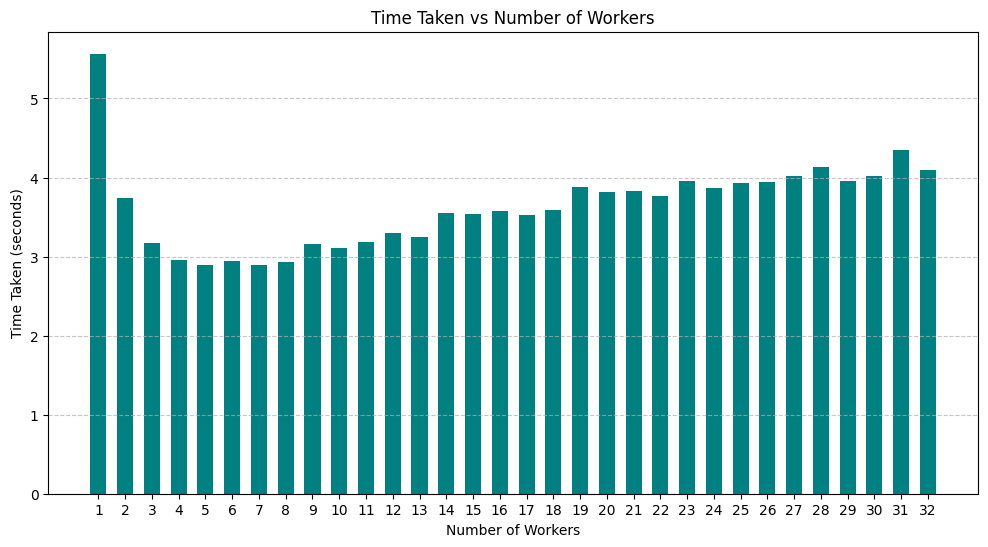

In [23]:
plot_average_execution_time(results)

In [27]:
config_to_evaluate = {
        "alg": MultiprocessorSchedulerType.GLOBAL_EDF,
        "heuristic": BestFit(decreasing_utilisation=True, verbose=False),
        "processors": 8,
        "number_of_workers": get_workers_range(1, 32)
    }
# python3 main.py tasksets-multiprocessor 8 partitioned -H bf -s du

results = average_execution_time_by_workers(config=config_to_evaluate, folder_name="tasksets-multiprocessor/")


Executing with: 1 workers.
Evaluating algorithm: GLOBAL_EDF
Evaluating test 1 of 10


AssertionError: daemonic processes are not allowed to have children

In [ ]:
plot_average_execution_time(results)

TypeError: plot_average_execution_time() missing 2 required positional arguments: 'plot_title' and 'workers'